# GAN Training

## imports

In [1]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

In [2]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari



Using TensorFlow backend.


In [3]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [4]:
(x_train, y_train) = load_safari(DATA_NAME)

In [5]:
x_train.shape

(80000, 28, 28, 1)

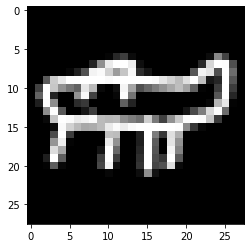

In [6]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray')

## architecture

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [8]:
gan.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0   

In [9]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       2049

## training

In [10]:
BATCH_SIZE = 256
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 50

In [11]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

/home/cataluna84/anaconda3/envs/tf-gpu-1/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.731)(R 0.695, F 0.767)] [D acc: (0.219)(0.438, 0.000)] [G loss: 0.679] [G acc: 1.000]


/home/cataluna84/anaconda3/envs/tf-gpu-1/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.710)(R 0.662, F 0.757)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.679] [G acc: 1.000]
2 [D loss: (0.713)(R 0.588, F 0.837)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.626] [G acc: 1.000]
3 [D loss: (1.911)(R 0.459, F 3.364)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.617] [G acc: 1.000]
4 [D loss: (0.649)(R 0.582, F 0.716)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.571] [G acc: 1.000]
5 [D loss: (0.643)(R 0.562, F 0.723)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.527] [G acc: 1.000]
6 [D loss: (0.639)(R 0.537, F 0.742)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.482] [G acc: 1.000]
7 [D loss: (0.661)(R 0.509, F 0.813)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.473] [G acc: 1.000]
8 [D loss: (0.686)(R 0.494, F 0.877)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.487] [G acc: 1.000]
9 [D loss: (0.711)(R 0.510, F 0.913)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.533] [G acc: 1.000]
10 [D loss: (0.707)(R 0.539, F 0.876)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.576] [G acc: 1.000]

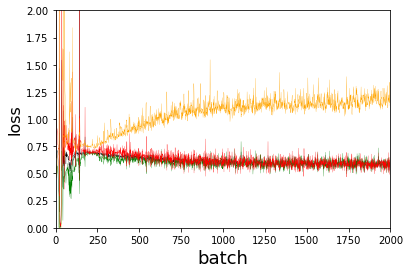

In [25]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()



In [26]:
fig.savefig(os.path.join(RUN_FOLDER, "lossBatch.png"), dpi=1000)


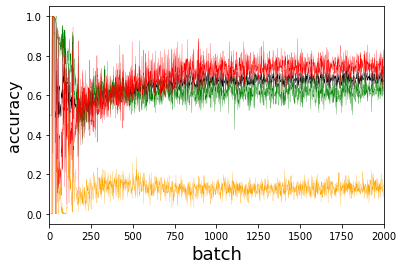

In [27]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

In [28]:
fig.savefig(os.path.join(RUN_FOLDER, "accuracyBatch.png"), dpi=1000)
